In [1]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib

In [2]:
df = pd.read_csv('diamonds.csv', index_col=None)

In [3]:
df.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [4]:
try:
  df = df.drop('Unnamed: 0', axis=1)
except:
  pass
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [5]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<h1>Step 1: Data Preprocessing</h1>

<h2>Data Cleaning</h2>

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [9]:
# Check for unusual values in 'x', 'y', 'z'
unusual_values = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]
print("\nNumber of unusual values for 'x', 'y', 'z' columns is: ", len(unusual_values))
print("\nPercentage of unusual values in dfset is: {:.4f}%".format((len(unusual_values) / len(df)) * 100))
print("\nUnusual values:\n", unusual_values)


Number of unusual values for 'x', 'y', 'z' columns is:  20

Percentage of unusual values in dfset is: 0.0371%

Unusual values:
        carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal     G     V

In [10]:
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]
unusual_values = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]
print("\nNumber of unusual values for 'x', 'y', 'z' columns is: ", len(unusual_values))


Number of unusual values for 'x', 'y', 'z' columns is:  0


<h2>Feature Engineering</h2>

In [11]:
print(df["cut"].unique())
print(df["color"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [12]:
# Map hierarchical labels to the 'cut' column
cut_mapping = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}
df['cut'] = df['cut'].map(cut_mapping)

# Map hierarchical labels to the 'color' column
color_mapping = {
    'D': 1,
    'E': 2,
    'F': 3,
    'G': 4,
    'H': 5,
    'I': 6,
    'J': 7
}
df['color'] = df['color'].map(color_mapping)
# One-hot encode remaining categorical features (clarity)
df = pd.get_dummies(df, columns=['clarity'], drop_first=True)

# Add a new feature for volume
df['volume'] = df['x'] * df['y'] * df['z']

# Display the transformed dfset
df.head(1)

<ipython-input-12-c973d8d96a25>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'] = df['cut'].map(cut_mapping)
<ipython-input-12-c973d8d96a25>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['color'].map(color_mapping)


,carat,cut,color,depth,table,price,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,volume
0,0.23,5,2,61.5,55.0,326,3.95,3.98,2.43,False,False,True,False,False,False,False,38.20203


<h2>Feature Scaling</h2>

In [13]:
# Define columns to scale
numeric_features = ['carat', 'depth', 'table', 'volume']

# Option 1: Standardization (Z-Score Scaling)
scaler_standard = StandardScaler()
df = df.copy()
df[numeric_features] = scaler_standard.fit_transform(df[numeric_features])

# Display results
print("\nStandardized Data:")
print(df.head(3))


Standardized Data:
      carat  cut  color     depth     table  price     x     y     z  \
0 -1.198204    5      2 -0.174203 -1.099725    326  3.95  3.98  2.43   
1 -1.240417    4      2 -1.361090  1.585988    326  3.89  3.84  2.31   
2 -1.198204    2      2 -3.385781  3.376463    327  4.05  4.07  2.31   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0       False        False         True        False        False   
1       False         True        False        False        False   
2       False        False        False         True        False   

   clarity_VVS1  clarity_VVS2    volume  
0         False         False -1.172291  
1         False         False -1.219546  
2         False         False -1.173891  


In [28]:
joblib.dump(scaler_standard, 'scaler.pkl')

['scaler.pkl']

<h1>Exploratory Data Analysis (EDA)</h1>

<h2>Correlation Analysis</h2>

In [ ]:
# Calculate correlations
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify top features most correlated with price
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
top_features = correlation_with_price.index[1:4]  # Top 3 features excluding 'price'

print("\nTop 3 features most correlated with price:")
print(correlation_with_price[1:4])

<h2>Data Visualization</h2>

In [ ]:
df.columns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(18, 16))

# Distribution Plots for `price`, `carat`, and `volume`
plt.subplot(3, 3, 1)
sns.histplot(df['price'], kde=True, color='blue', bins=10)
plt.title('Distribution of Price')

plt.subplot(3, 3, 2)
sns.histplot(df['carat'], kde=True, color='green', bins=10)
plt.title('Distribution of Carat')

plt.subplot(3, 3, 3)
sns.histplot(df['volume'], kde=True, color='purple', bins=10)
plt.title('Distribution of Volume')

# Scatter Plots to visualize relationships
plt.subplot(3, 3, 4)
sns.scatterplot(x='carat', y='price', data=df, color='red')
plt.title('Carat vs Price')

plt.subplot(3, 3, 5)
sns.scatterplot(x='volume', y='price', data=df, color='orange')
plt.title('Volume vs Price')

plt.subplot(3, 3, 6)
sns.scatterplot(x='depth', y='price', data=df, color='cyan')
plt.title('Depth vs Price')

# Box Plots for categorical features (cut, color)
plt.subplot(3, 3, 7)
sns.boxplot(x='cut', y='price', data=df, palette='Set2')
plt.title('Price Distribution by Cut')

plt.subplot(3, 3, 8)
sns.boxplot(x='color', y='price', data=df, palette='Set2')
plt.title('Price Distribution by Color')

plt.subplot(3, 3, 9)
sns.boxplot(x=df[['clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']].idxmax(axis=1), y='price', data=df, palette='Set2')
plt.title('Price Distribution by Clarity')

plt.tight_layout()
plt.show()

# Additional violin plots to analyze distributions
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
sns.violinplot(x='cut', y='price', data=df, palette='Set2')
plt.title('Violin Plot: Price by Cut')

plt.subplot(1, 3, 2)
sns.violinplot(x='color', y='price', data=df, palette='Set2')
plt.title('Violin Plot: Price by Color')

plt.subplot(1, 3, 3)
sns.violinplot(x=df[['clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']].idxmax(axis=1), y='price', data=df, palette='Set2')
plt.title('Violin Plot: Price by Clarity')

plt.tight_layout()
plt.show()


<h1></h1

<h1>Model Building</h1>

<h2>Train-Test Split</h2>

In [15]:
# Define the feature matrix (X) and target vector (y)
X = df.drop('price', axis=1)  # Features (all columns except price)
y = df['price']  # Target variable (price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the size of training and testing sets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 43136
Testing set size: 10784


<h2>Model Selection</h2>

In [16]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression - MSE:", mse_linear)
print("Linear Regression - R2 Score:", r2_linear)

Linear Regression - MSE: 1280158.920708179
Linear Regression - R2 Score: 0.9201495232013194


In [17]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

# Set the degree of the polynomial
degree = 2

# Create a pipeline: PolynomialFeatures + Ridge Regression
poly_ridge_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('ridge_regression', Ridge(alpha=1.0))  # Ridge with regularization strength alpha
])

# Train the model
poly_ridge_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred_poly_ridge = poly_ridge_pipeline.predict(X_test)

# Evaluate the model
mse_poly_ridge = mean_squared_error(y_test, y_pred_poly_ridge)
r2_poly_ridge = r2_score(y_test, y_pred_poly_ridge)

print(f"Polynomial Ridge Regression (degree={degree}) - MSE: {mse_poly_ridge}")
print(f"Polynomial Ridge Regression (degree={degree}) - R2 Score: {r2_poly_ridge}")


Polynomial Ridge Regression (degree=2) - MSE: 12063719.358105578
Polynomial Ridge Regression (degree=2) - R2 Score: 0.24752018899550943


In [18]:
# Scale the data for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model with RBF kernel
svr_rbf_model = SVR(kernel='rbf')
svr_rbf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svr = svr_rbf_model.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR (RBF Kernel) - MSE:", mse_svr)
print("SVR (RBF Kernel) - R2 Score:", r2_svr)


SVR (RBF Kernel) - MSE: 8683262.224835768
SVR (RBF Kernel) - R2 Score: 0.4583776923278069


In [19]:
# Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on test data
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree - MSE:", mse_tree)
print("Decision Tree - R2 Score:", r2_tree)

Decision Tree - MSE: 688876.8882938715
Decision Tree - R2 Score: 0.957031000529663


In [20]:
# Random Forest
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)

# Predict on test data
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest - MSE:", mse_forest)
print("Random Forest - R2 Score:", r2_forest)

Random Forest - MSE: 353942.06027194345
Random Forest - R2 Score: 0.9779227080211359


In [21]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting - MSE:", mse_gb)
print("Gradient Boosting - R2 Score:", r2_gb)


Gradient Boosting - MSE: 596281.5612181386
Gradient Boosting - R2 Score: 0.962806674859407


In [70]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost
xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost - MSE:", mse_xgb)
print("XGBoost - R2 Score:", r2_xgb)


XGBoost - MSE: 357174.9376508553
XGBoost - R2 Score: 0.9777210354804993


<h2>Model Evaluation</h2>

In [22]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")

    return mae, rmse, r2


In [75]:
mae_linear, rmse_linear, r2_linear = evaluate_model(y_test, y_pred_linear, "Linear Regression")
mae_poly_ridge, rmse_poly_ridge, r2_poly_ridge = evaluate_model(y_test, y_pred_poly_ridge, "Polynomial Regression")
mae_svr, rmse_svr, r2_svr = evaluate_model(y_test, y_pred_svr, "SVR (RBF Kernel)")
mae_tree, rmse_tree, r2_tree = evaluate_model(y_test, y_pred_tree, "Decision Tree")
mae_forest, rmse_forest, r2_forest = evaluate_model(y_test, y_pred_forest, "Random Forest")
mae_gb, rmse_gb, r2_gb = evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
mae_xgb, rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_gb, "XGB")


Evaluation Metrics for Linear Regression:
Mean Absolute Error (MAE): 748.33
Root Mean Squared Error (RMSE): 1131.44
R-squared (R²): 0.92

Evaluation Metrics for Polynomial Regression:
Mean Absolute Error (MAE): 461.29
Root Mean Squared Error (RMSE): 3473.29
R-squared (R²): 0.25

Evaluation Metrics for SVR (RBF Kernel):
Mean Absolute Error (MAE): 1418.58
Root Mean Squared Error (RMSE): 2946.74
R-squared (R²): 0.46

Evaluation Metrics for Decision Tree:
Mean Absolute Error (MAE): 375.06
Root Mean Squared Error (RMSE): 829.99
R-squared (R²): 0.96

Evaluation Metrics for Random Forest:
Mean Absolute Error (MAE): 282.38
Root Mean Squared Error (RMSE): 594.93
R-squared (R²): 0.98

Evaluation Metrics for Gradient Boosting:
Mean Absolute Error (MAE): 409.77
Root Mean Squared Error (RMSE): 772.19
R-squared (R²): 0.96

Evaluation Metrics for XGB:
Mean Absolute Error (MAE): 409.77
Root Mean Squared Error (RMSE): 772.19
R-squared (R²): 0.96


In [77]:
# Create a DataFrame to summarize metrics
evaluation_summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'SVR (RBF Kernel)',
              'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGB'],
    'MAE': [mae_linear, mae_poly_ridge, mae_svr, mae_tree, mae_forest, mae_gb, mae_xgb],
    'RMSE': [rmse_linear, rmse_poly_ridge, rmse_svr, rmse_tree, rmse_forest, rmse_gb, rmse_xgb],
    'R²': [r2_linear, r2_poly_ridge, r2_svr, r2_tree, r2_forest, r2_gb, r2_xgb]
})

# Sort by R² score
evaluation_summary = evaluation_summary.sort_values(by='R²', ascending=False)
print(evaluation_summary)


                   Model          MAE         RMSE        R²
4          Random Forest   282.384150   594.930299  0.977923
5      Gradient Boosting   409.765199   772.192697  0.962807
6                    XGB   409.765199   772.192697  0.962807
3          Decision Tree   375.060815   829.986077  0.957031
0      Linear Regression   748.333811  1131.441081  0.920150
2       SVR (RBF Kernel)  1418.577644  2946.737556  0.458378
1  Polynomial Regression   461.285398  3473.286536  0.247520


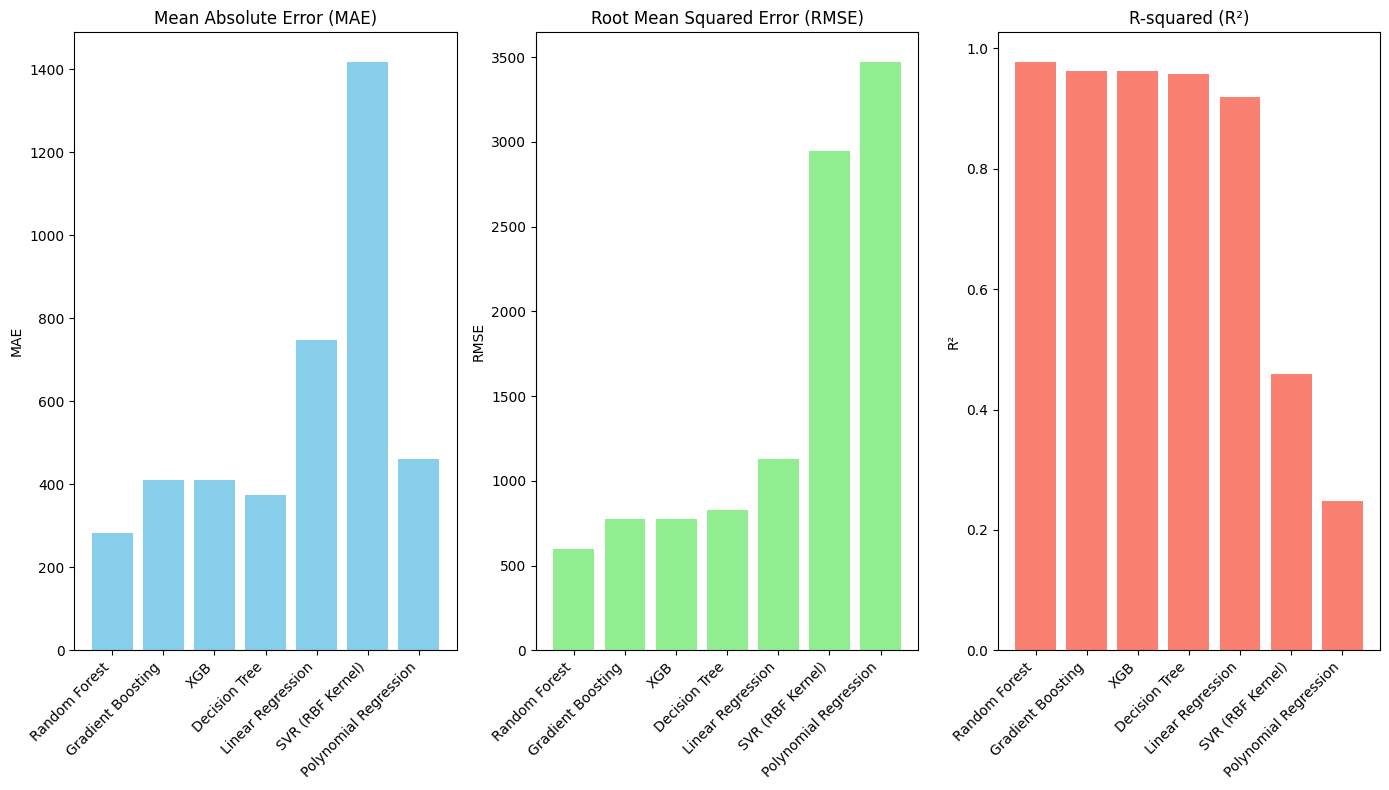

In [78]:
# Plot the metrics
plt.figure(figsize=(14, 8))

# MAE Comparison
plt.subplot(1, 3, 1)
plt.bar(evaluation_summary['Model'], evaluation_summary['MAE'], color='skyblue')
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('MAE')

# RMSE Comparison
plt.subplot(1, 3, 2)
plt.bar(evaluation_summary['Model'], evaluation_summary['RMSE'], color='lightgreen')
plt.title('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE')

# R² Comparison
plt.subplot(1, 3, 3)
plt.bar(evaluation_summary['Model'], evaluation_summary['R²'], color='salmon')
plt.title('R-squared (R²)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R²')

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
# Save the best model
joblib.dump(xgb_model, f"xgb_model.pkl")

print(f"xgb_model saved")

linear_model saved
